## Matplotlib
Matplotlib é uma biblioteeca Python para traçar gráficos 2D que produz figuras de qualidades em vários formatos distintos. Malplolib pode ser usado em scripts Python, no Python e IPython shell, no jupyter notebook entre outros.

Matplotlib é uma ferramenta bem versátil, que nos permite fazer praticamente qualquer tipo de gráfico (nem todos de maneira fácil). Pode-se traçar pontos, histogramas, gráfico em barras, gráficos de dispersão, etc., com poucas linhas de código ([galeria](https://matplotlib.org/gallery.html)).

Praticamente, todoas as bibliotecas de visualização estatísticas, tais como seaborn, plotnine entre outras, são construídas utilizando rotinas do Matplotlib.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline 
# função do jupyter para gerar não precisa escrever a plt.show

np.random.seed(123)

<function matplotlib.pyplot.show(*args, **kw)>

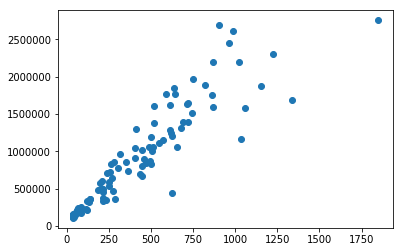

In [8]:
X = np.abs(np.random.normal(60, 500, 100))[:, np.newaxis]
X[X <= 40] = 40
w = 2000
y = X * (w - np.random.normal(0, 500, X.shape[0]))[:, np.newaxis] + 60000

plt.scatter(X, y)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

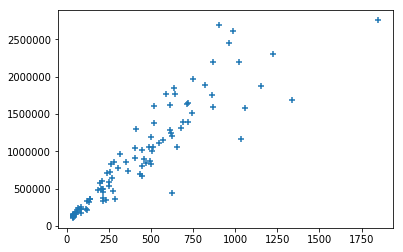

In [12]:
plt.scatter(X, y, marker = '+')
#plt.show

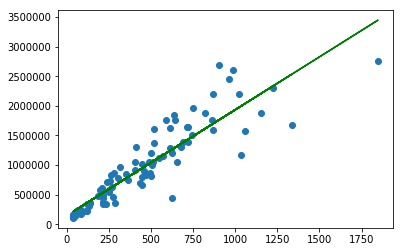

In [19]:
X_1 = np.hstack((np.ones((X.shape[0], 1)), X))

# estima a inclinação da reta com método dos mínimos quadrado
b, w = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T).dot(y).ravel()

plt.scatter(X, y)
plt.plot(X, w * X + b, color = "green")

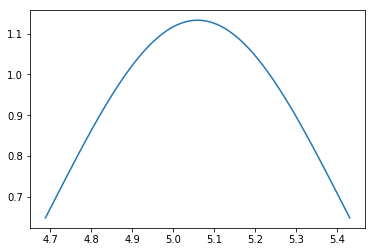

In [23]:
mu = 5.06
varianca = 0.124
sigma = np.sqrt(varianca)
x = np.linspace(mu - 3 * varianca, mu + 3 * varianca, 100)

# plotando uma distruição normal
plt.plot(x, stats.norm(mu, sigma).pdf(x))

## Gráficos Estatísticos

Muitas vezes em nossas análises os gráficos produzidos são os mesmo, mudando apenas o conjunto de dados em questão. 

Apesar do Matplotlib ser muito versátil, muitas vezes é tedioso fazer gráfico com ele, pois ele é um tanto baixo-nível devido, justamente, há sua versatilidade.

Há em python algumas bibliotecas para traçar gráficos predefinidos que foram projetados para se integrar muito bem ao pandas.DataFrame.

Duas dessas bibliotecas são o [Searborn](https://seaborn.pydata.org/) e [Plotnine](https://github.com/has2k1/plotnine). Nesse curso vamos forcar apenas no Plotine, pois o Plotnine é inspirado no ggplot 2 do R que é uma ferramenta de visualização poderozíssima.

### Plotnine

Plotnine é uma implementação de uma [grámaticas de gráficos](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448/ref=as_li_ss_tl?ie=UTF8&qid=1477928463&sr=8-1&keywords=the+grammar+of+graphics&linkCode=sl1&tag=ggplot2-20&linkId=f0130e557161b83fbe97ba0e9175c431) em Python, é baseada no [ggplot2](http://ggplot2.tidyverse.org/reference/). A gramática nos permite compor gráficos mapeando explicitamente dados aos objetos visuais compõe o gráfico.

Traçar gráficos com uma gramática é poderoso, ela torna gráficos personalizados, muitas vezes complexos, fácil de se imaginar e criá-los, enquanto os gráficos simples se mantém simples.

Basicamente, você provê o dado, dizendo ao plotnine como mapeá-los a elementos estéticos, quais primitivas gráficas utilizar, e ele cuida dos detalhes técnicos.

#### O que é gramática de gráficos?

A ideia básica é: independemente especificar *building blocks* do gráfico e combiná-los para criar qualquer tipo de gráfico. Os building blocks são:

- dados
- mapa estético
- objeto geométrico
- transformação estatística
- escalas
- sistemas de cooredenadas
- ajustes de posição
- faceting

In [5]:
from plotnine import *

X = np.abs(np.random.normal(60, 500, 100))[:, np.newaxis]
X[X <= 40] = 40
w = 2000
y = X * (w - np.random.normal(0, 500, X.shape[0]))[:, np.newaxis] + 60000

df = pd.DataFrame(np.hstack((X, y)), columns = ['area', 'preco'])

df.head()

,area,preco
0,482.815302,8.706337e+05
1,558.672723,1.729841e+06
2,201.489249,3.912217e+05
3,693.147357,5.457910e+05
4,229.300126,5.214236e+05


/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


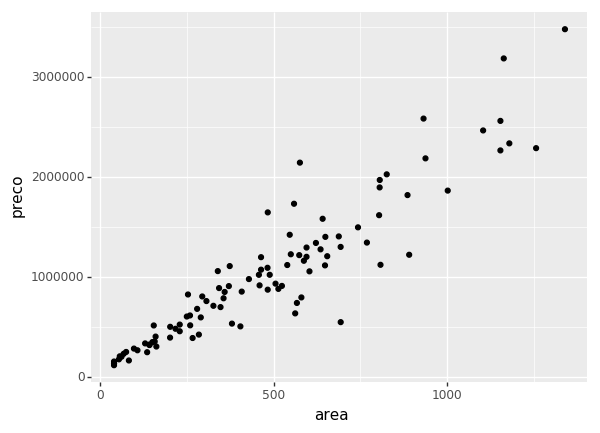

<ggplot: (278469552)>

In [6]:
(ggplot(df, aes(x = 'area', y = 'preco')) + geom_point())

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


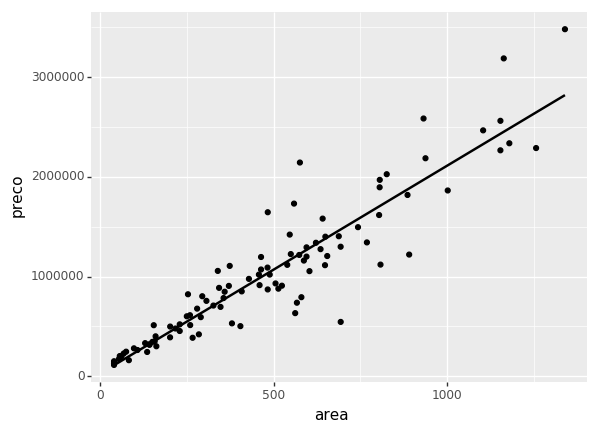

<ggplot: (-9223372036576216702)>

In [8]:
(ggplot(df, aes(x = 'area', y = 'preco')) + geom_point() + geom_smooth(method = 'lm', se = False))

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


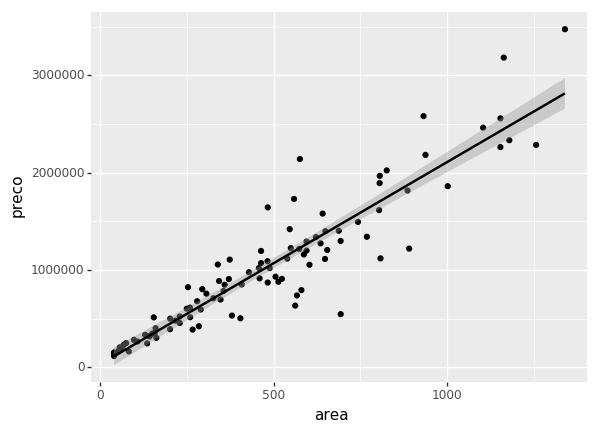

<ggplot: (-9223372036576312316)>

In [9]:
(ggplot(df, aes(x = 'area', y = 'preco')) + geom_point() + geom_smooth(method = 'lm', se = True))

## Objetos Geométricos e Mapas Estéticos

### Mapa Estétisco

No plotnine(ggplot) estéticos (a.k.a. aesthetic) significa tudo que você pode ver. Por exemplo:

- posição (i.e., nos eixos x e y)
- cor (color) 
- preenchimento (fill)
- formato dos pontos (shape)
- tipo da linha (linetype)
- tamanho (size)

In [12]:
iris = pd.read_csv('dados/iris-dataset.csv', header = None, names = ['sepal_length',
                                                                     'sepal_width',
                                                                     'petal_length',
                                                                     'petal_width',
                                                                     'species'])

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


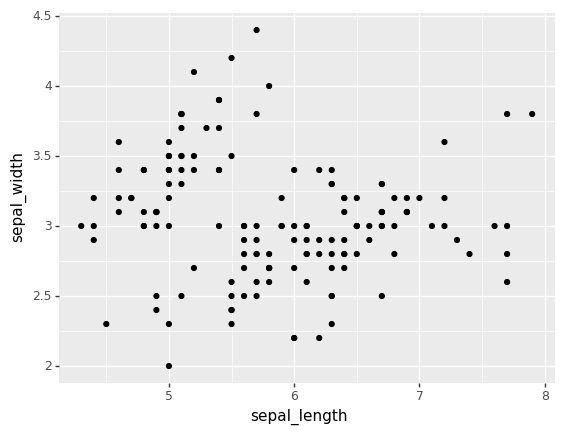

<ggplot: (279910506)>

In [11]:
ggplot(iris, aes(x = 'sepal_length', y = 'sepal_width')) + geom_point()

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


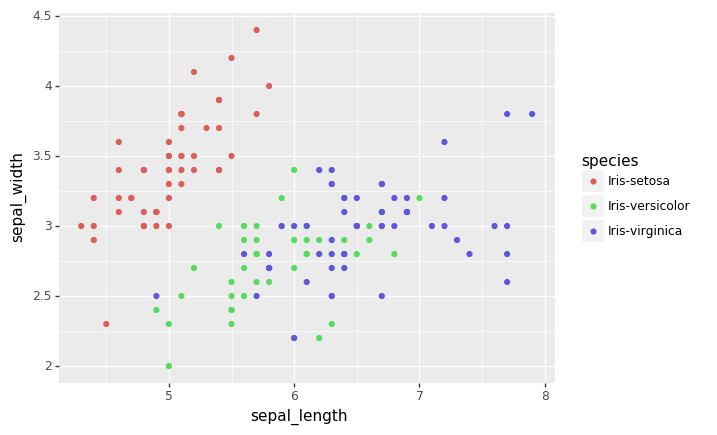

<ggplot: (-9223372036576206802)>

In [13]:
# adicione os seguintes aesthetic: size = 'petal_width', shape = 'species', color = "petal_width"
ggplot(iris, aes(x = 'sepal_length', y = 'sepal_width', color = 'species')) + geom_point()

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


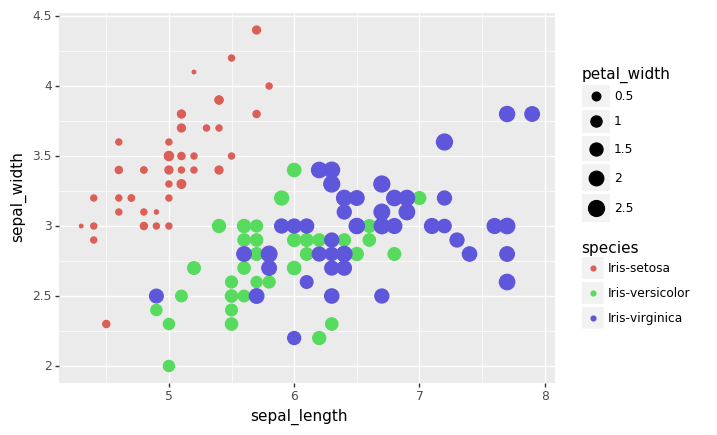

<ggplot: (-9223372036574322940)>

In [15]:
ggplot(iris, aes(x = 'sepal_length', y = 'sepal_width', 
                 color = 'species', size = 'petal_width')) + geom_point()

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


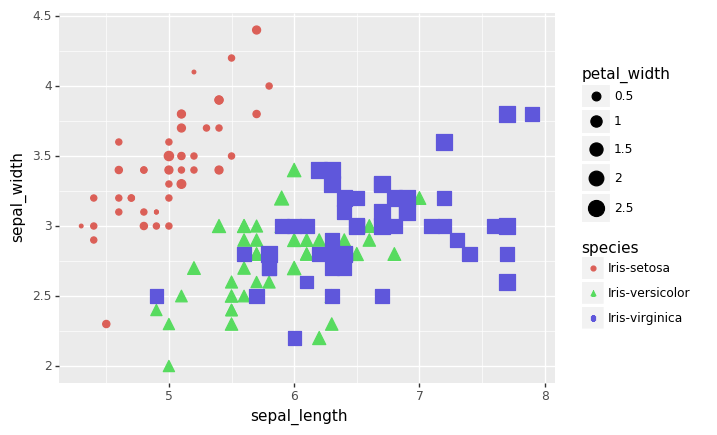

<ggplot: (-9223372036574180527)>

In [16]:
ggplot(iris, aes(x = 'sepal_length', y = 'sepal_width', 
                 color = 'species', size = 'petal_width', shape = 'species')) + geom_point()

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


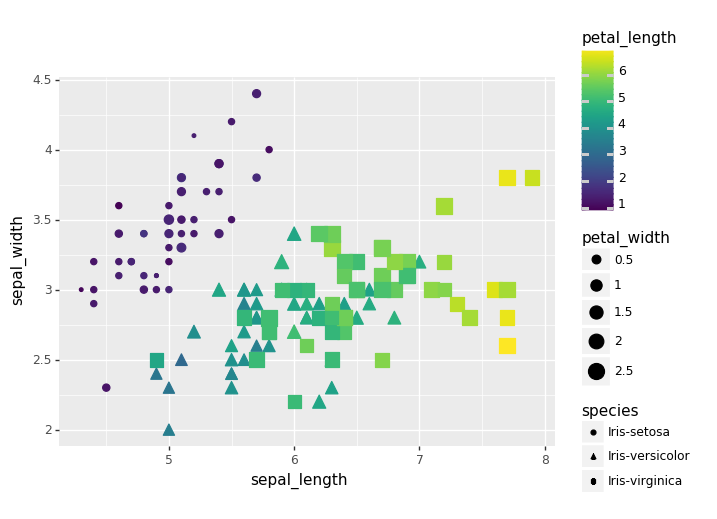

<ggplot: (-9223372036573677112)>

In [18]:
ggplot(iris, aes(x = 'sepal_length', y = 'sepal_width', 
                 color = 'petal_length', size = 'petal_width', 
                 shape = 'species')) + geom_point()

## Objectos Geométricos (geom)

Objetos geométricos são o que é de fato traçado. Exemplos são:

- pontos (geom_point, para gráficos de dispersão)
- linhas (geom_line, para time series, tendências, etc)
- boxplot (geom_boxplot)

Um gráfico deve ter pelo menos um geom; não quantidade máxima. Você pode adicionar geom ao seu gráfico com operador **+** .

Você pode listar os objetos geométricos disponíveis abaixo:

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


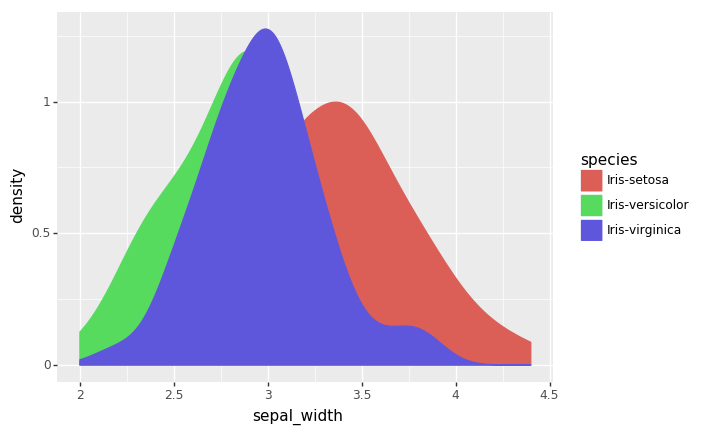

<ggplot: (280851183)>

In [19]:
ggplot(iris, aes(x = 'sepal_width', fill = 'species', color = 'species')) + geom_density()

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


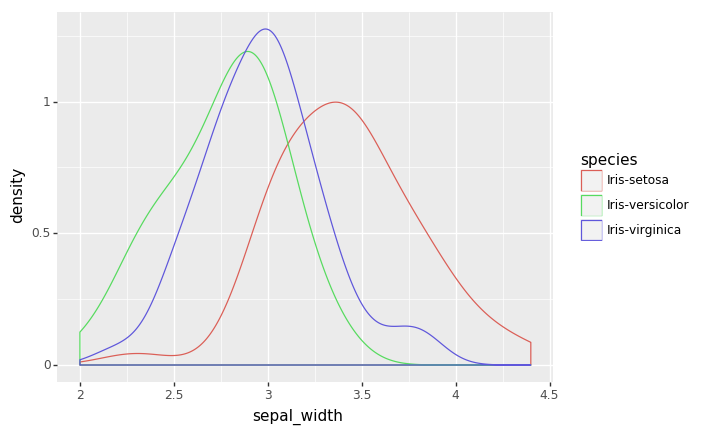

<ggplot: (-9223372036573588522)>

In [20]:
ggplot(iris, aes(x = 'sepal_width', color = 'species')) + geom_density()

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


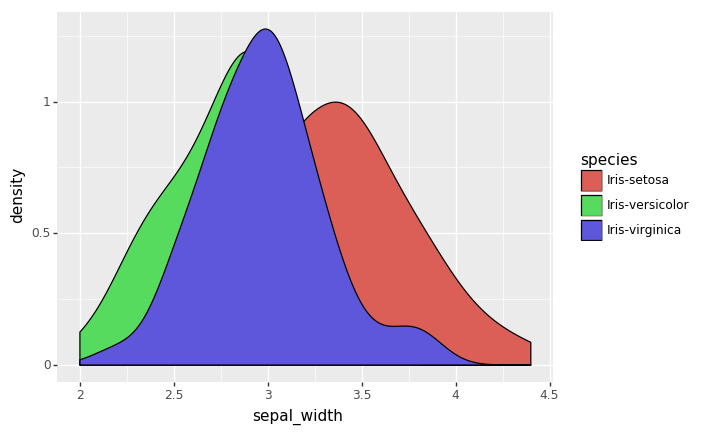

<ggplot: (280872831)>

In [21]:
ggplot(iris, aes(x = 'sepal_width', fill = 'species')) + geom_density()

In [24]:
ggplot(iris, aes(x = 'sepal_length', y = 'sepal_width',
                 color = 'species', fill = 'species')) + geom_density_2d()

NameError: name 'geom_density_2d' is not defined

### Boxplot

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/anaconda3/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


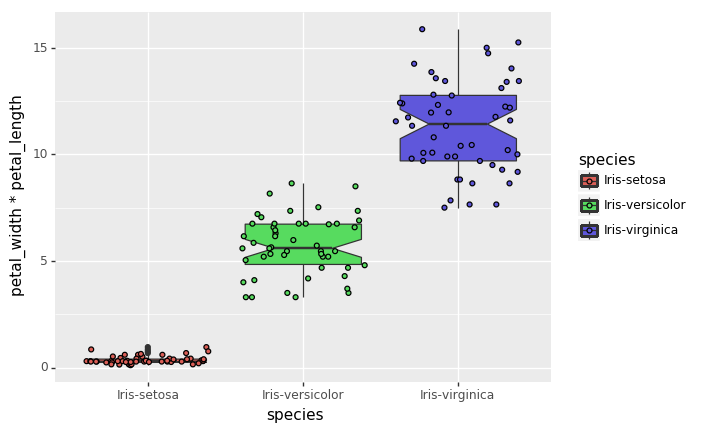

<ggplot: (279826952)>

In [28]:
(ggplot(iris, aes(x = 'species', y = 'petal_width * petal_length', fill = 'species')) +
 geom_boxplot(notch = True) + geom_jitter())

### Violin plot

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/anaconda3/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


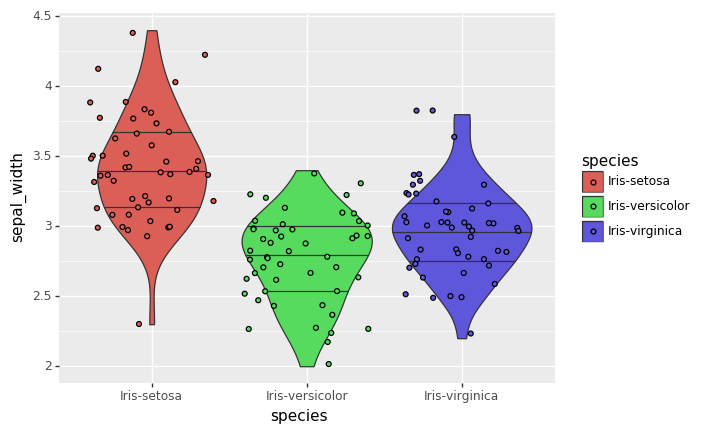

<ggplot: (280072424)>

In [29]:
(ggplot(iris, aes(x = 'species', y = 'sepal_width', fill = 'species')) + 
 geom_violin(draw_quantiles = (0.25, 0.5, 0.75)) +
 geom_jitter())

### Faceting

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


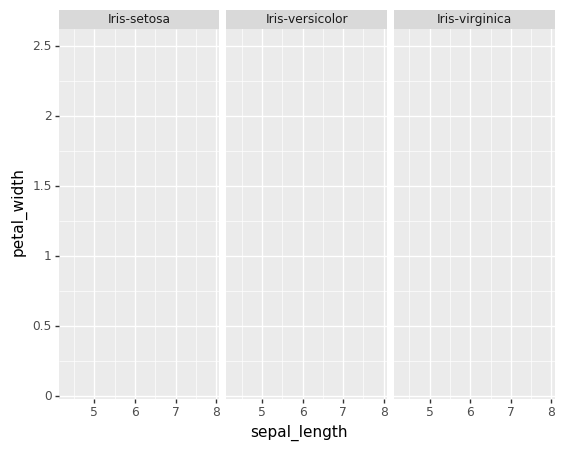

<ggplot: (280849058)>

In [31]:
(ggplot(iris, aes(x = 'sepal_length', y = 'petal_width', color = 'species')) + 
 geom_density_2d() + 
 facet_wrap('~species'))

`facet_grid` fomar uma matriz de paineis definida pela colunas e linhas. É mais util quando se há duas variáveis discretas, e todas as combinações delas existem no dado.

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


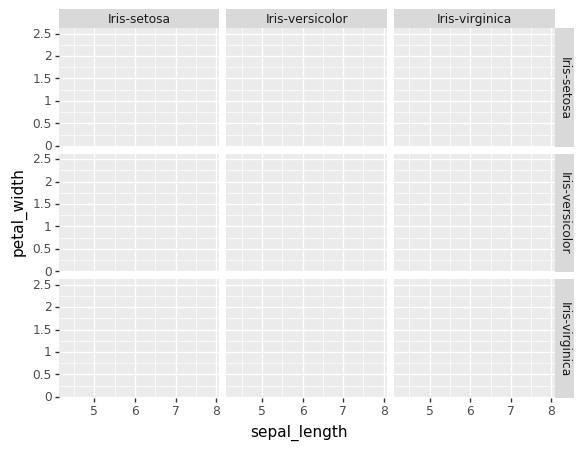

<ggplot: (280166534)>

In [34]:
iris['species1'] = iris.species
(ggplot(iris, aes(x='sepal_length',
                      y='petal_width', 
                      color='species')) + 
geom_density_2d() +
facet_grid('species1~species'))